In [1]:
#loaded necessary imports
from dotenv import load_dotenv
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
pn.extension('plotly')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib.pylab import date2num

In [33]:
#extracting data from Yahoo Finance API
tickers = ['ALGN', 'CROX']
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(2021,1,1), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

In [34]:
#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 

In [35]:
#Checking for NaNs
all_data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
symbol       0
return       2
dtype: int64

In [36]:
#Seperating data by tickers
algn_data = all_data.loc[all_data['symbol'] == 'ALGN']
crox_data = all_data.loc[all_data['symbol'] == 'CROX']

In [37]:
#Show Data 
algn_data

High         Low        Open       Close   Volume  \
Date                                                                  
2021-01-04  560.000000  519.700012  549.609985  526.460022   602400   
2021-01-05  544.070007  526.770020  526.969971  543.650024   344800   
2021-01-06  546.479980  531.460022  534.330017  540.390015   429000   
2021-01-07  561.349976  544.270020  547.780029  558.359985   513900   
2021-01-08  579.500000  559.000000  561.630005  570.530029   464200   
2021-01-11  566.099976  551.830017  565.010010  557.039978   351800   
2021-01-12  562.390015  548.409973  552.340027  552.880005   329000   
2021-01-13  553.760010  543.909973  551.260010  551.140015   322000   
2021-01-14  561.119995  543.010010  546.510010  554.640015   304700   
2021-01-15  569.659973  548.000000  553.190002  567.229980   551700   
2021-01-19  574.719971  545.080017  574.719971  557.409973   606900   
2021-01-20  575.919983  560.070007  568.840027  564.369995   401800   
2021-01-21  565.320007  543.320007  563.969971  543.809998   402600   
2021-01-22  546.849976  531.169983  546.849976  534.080017   690700   
2021-01-25  540.739990  510.109985  533.390015  539.469971   568800   
2021-01-26  545.000000  530.059998  541.270020  535.099976   469400   
2021-01-27  527.690002  507.769989  519.330017  509.640015   859100   
2021-01-28  547.570007  509.359985  509.359985  536.580017   681500   
2021-01-29  530.539978  517.539978  525.159973  525.380005   686200   
2021-02-01  544.750000  527.020020  539.929993  543.049988   538500   
2021-02-02  567.830017  548.010010  551.780029  557.770020   790900   
2021-02-03  557.489990  541.169983  557.489990  546.179993   756300   
2021-02-04  634.460022  600.950012  607.500000  615.159973  1758800   
2021-02-05  624.539978  614.010010  622.090027  620.450012   656500   
2021-02-08  630.039978  595.780029  622.190002  602.440002   618300   
2021-02-09  618.840027  601.390015  601.390015  615.000000   426900   
2021-02-10  618.070007  598.210022  618.070007  605.780029   454100   
2021-02-11  611.770020  591.150024  611.770020  599.000000   469200   
2021-02-12  609.989990  595.159973  601.859985  609.580017   394900   
2021-02-16  615.760010  604.070007  612.690002  614.210022   404600   
...                ...         ...         ...         ...      ...   
2021-06-10  612.559998  582.549988  585.809998  612.150024   585400   
2021-06-11  615.799988  605.640015  611.989990  611.539978   345000   
2021-06-14  614.950012  601.200012  613.590027  605.770020   381700   
2021-06-15  613.150024  596.119995  609.380005  600.049988   398500   
2021-06-16  601.880005  587.590027  599.200012  599.599976   414400   
2021-06-17  616.659973  595.820007  596.799988  613.330017   600000   
2021-06-18  617.109985  599.340027  609.780029  601.640015   993800   
2021-06-21  615.179993  597.840027  604.940002  611.539978   549400   
2021-06-22  611.809998  598.109985  611.510010  604.710022   618200   
2021-06-23  608.609985  596.000000  602.390015  605.820007   574900   
2021-06-24  627.440002  608.000000  609.640015  617.390015   837500   
2021-06-25  625.650024  607.320007  623.000000  614.979980  2123200   
2021-06-28  629.349976  614.429993  618.450012  621.520020   574900   
2021-06-29  624.549988  611.570007  623.000000  612.799988   427500   
2021-06-30  616.080017  603.539978  608.729980  611.000000   508800   
2021-07-01  619.039978  607.590027  609.309998  618.960022   658800   
2021-07-02  625.359985  615.359985  624.809998  624.169983   372800   
2021-07-06  626.960022  592.130005  624.039978  604.669983   846800   
2021-07-07  617.270020  604.010010  609.010010  612.219971   370800   
2021-07-08  620.530029  598.020020  604.929993  616.789978   410600   
2021-07-09  638.479980  613.710022  621.919983  627.190002   610100   
2021-07-12  644.890015  623.750000  631.700012  642.859985   573800   
2021-07-13  647.830017  636.450012  642.859985  642.400024   400300   
2021-07-14  653.859985  631.729980  647.50

In [38]:
crox_data

High         Low        Open       Close   Volume  \
Date                                                                  
2021-01-04   63.349998   60.669998   63.150002   61.560001  1347200   
2021-01-05   64.860001   61.180000   61.180000   64.209999   917500   
2021-01-06   67.839996   63.389999   64.820000   67.620003  1280800   
2021-01-07   70.410004   66.750000   68.489998   67.180000   965700   
2021-01-08   68.580002   65.949997   67.800003   66.779999   995100   
2021-01-11   76.379997   70.870003   73.599998   74.970001  3417900   
2021-01-12   77.900002   74.489998   75.550003   77.650002  1208100   
2021-01-13   78.680000   75.820000   77.980003   76.360001   818700   
2021-01-14   78.680000   75.800003   77.269997   76.010002   772600   
2021-01-15   76.209999   73.669998   76.010002   75.190002   790500   
2021-01-19   77.110001   74.410004   75.910004   76.120003   773800   
2021-01-20   78.339996   75.760002   76.919998   76.269997   662100   
2021-01-21   77.570000   73.150002   76.760002   73.739998   964100   
2021-01-22   75.430000   72.519997   73.480003   73.339996   989100   
2021-01-25   74.750000   71.050003   73.180000   73.910004  1102500   
2021-01-26   74.690002   71.800003   74.559998   72.239998   819000   
2021-01-27   70.430000   65.370003   70.430000   65.800003  2100100   
2021-01-28   70.809998   66.699997   67.230003   70.370003  1414100   
2021-01-29   72.070000   68.500000   70.139999   70.019997  1264100   
2021-02-01   72.980003   68.580002   71.000000   72.769997   836800   
2021-02-02   76.089996   73.320000   73.720001   75.459999  1424900   
2021-02-03   77.120003   73.949997   75.889999   74.930000   736700   
2021-02-04   76.800003   74.169998   75.300003   75.040001   615000   
2021-02-05   77.160004   74.809998   75.720001   75.519997  1062400   
2021-02-08   78.470001   76.349998   76.959999   77.809998   870000   
2021-02-09   81.070000   77.250000   77.480003   79.879997   900700   
2021-02-10   81.610001   76.809998   81.360001   78.730003   682300   
2021-02-11   79.910004   77.529999   79.360001   79.480003   653800   
2021-02-12   81.839996   78.720001   79.220001   81.709999   496000   
2021-02-16   83.199997   79.419998   82.459999   81.239998   773500   
...                ...         ...         ...         ...      ...   
2021-06-10  105.809998  103.029999  105.330002  104.540001   940100   
2021-06-11  108.669998  105.050003  105.800003  108.639999   982300   
2021-06-14  115.370003  109.519997  109.760002  112.580002  2497700   
2021-06-15  112.989998  109.949997  112.470001  110.570000  1325100   
2021-06-16  111.959999  107.290001  110.900002  110.400002  1111500   
2021-06-17  110.620003  105.589996  109.959999  108.209999  1516500   
2021-06-18  107.940002  103.349998  106.540001  104.500000  1886300   
2021-06-21  108.580002  105.279999  105.900002  107.440002  1052100   
2021-06-22  110.849998  105.900002  107.699997  110.389999   900100   
2021-06-23  112.849998  108.879997  111.400002  111.250000   999300   
2021-06-24  113.720001  110.760002  112.330002  113.120003   756700   
2021-06-25  117.430000  113.300003  114.660004  114.410004  2262300   
2021-06-28  117.309998  114.300003  114.779999  116.059998   877200   
2021-06-29  117.980003  114.870003  116.489998  115.650002   859200   
2021-06-30  116.849998  114.739998  115.529999  116.519997   853100   
2021-07-01  118.680000  116.019997  116.750000  117.000000  1295800   
2021-07-02  118.059998  116.089996  117.489998  116.800003   596000   
2021-07-06  117.010002  111.669998  116.940002  113.629997  1228800   
2021-07-07  114.220001  111.000000  113.500000  112.809998   843200   
2021-07-08  114.300003  106.199997  109.750000  113.449997   957500   
2021-07-09  117.379997  114.559998  114.559998  117.000000   672500   
2021-07-12  117.830002  115.089996  117.000000  117.610001   706200   
2021-07-13  117.989998  115.389999  117.029999  117.059998   571600   
2021-07-14  120.919998  116.400002  118.58

In [39]:
#RSI FUNCTION
#30 and below is underbought, 70 and above is overbought
#https://www.roelpeters.be/many-ways-to-calculate-the-rsi-in-python-pandas/
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [40]:
algn_rsi = rsi(algn_data, periods=14, ema=True)

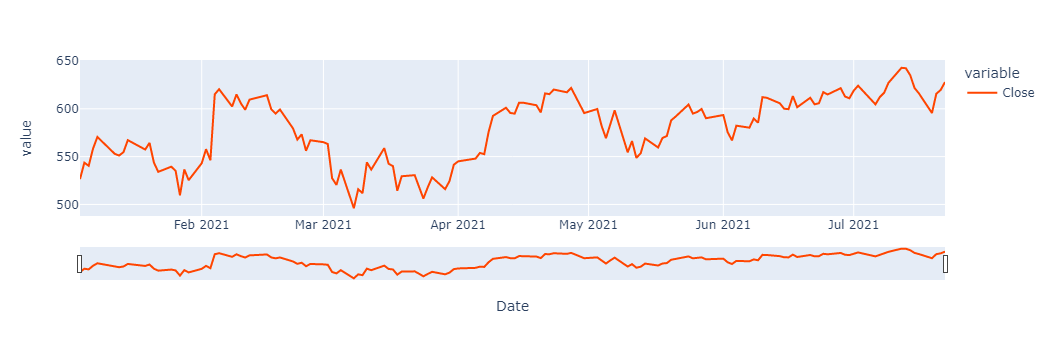

In [41]:
fig = px.line(algn_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

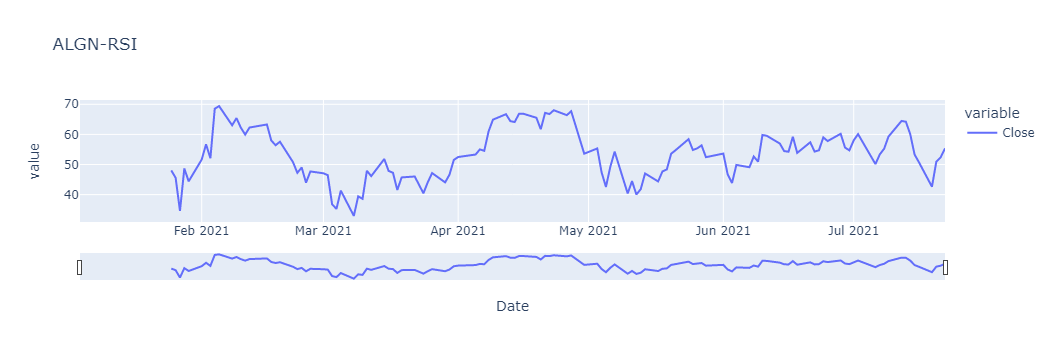

In [42]:
fig2 = px.line(algn_rsi, title='ALGN-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

In [43]:
crox_rsi = rsi(crox_data, periods=14, ema=True)

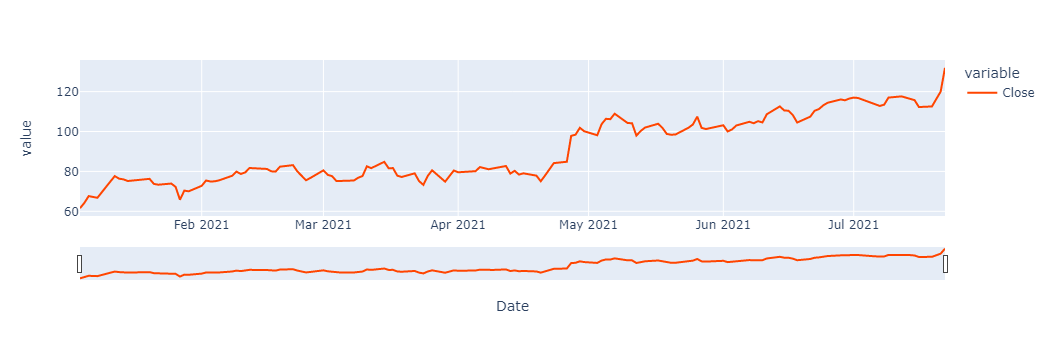

In [44]:
fig = px.line(crox_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

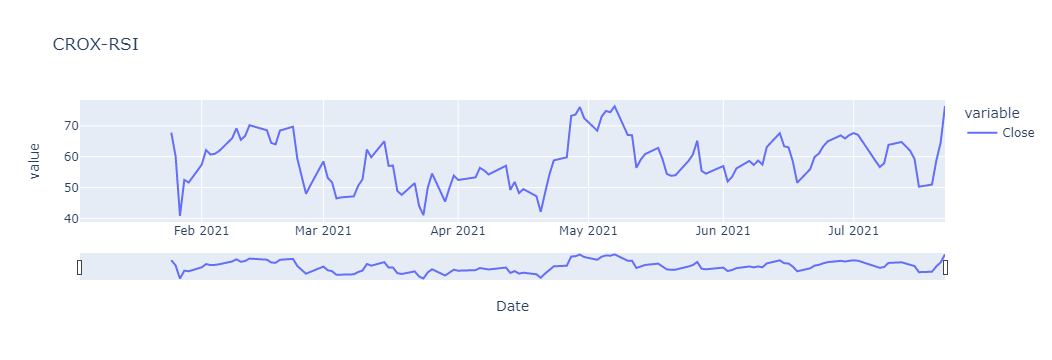

In [45]:
fig2 = px.line(crox_rsi, title='CROX-RSI')
fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

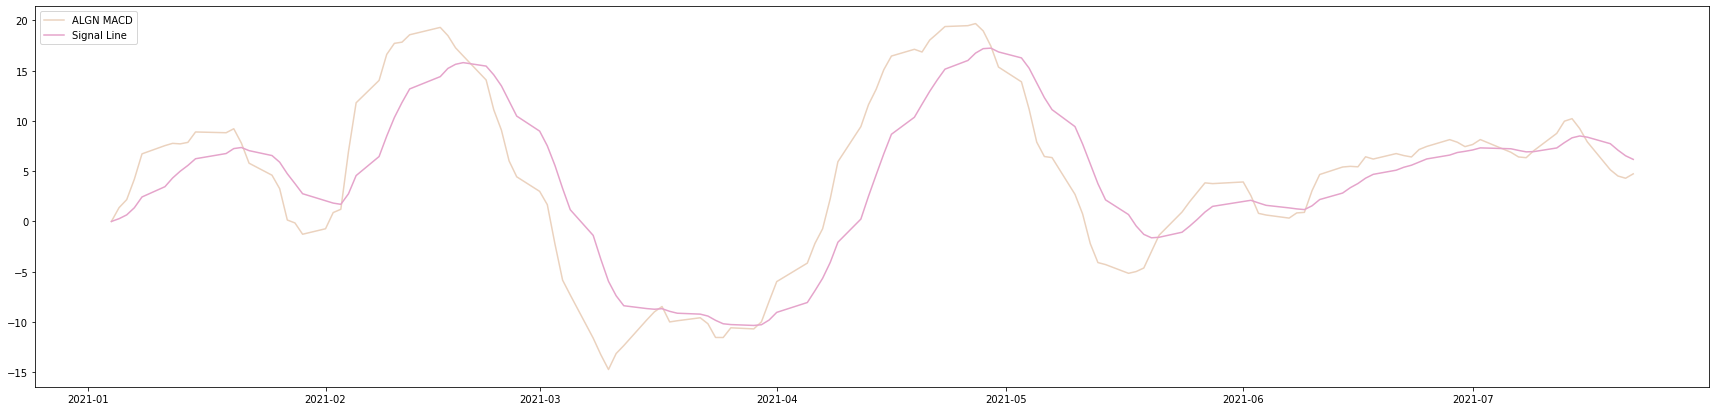

In [58]:
#Moving Average Convergence Divergence MACD, consists of MACD line and signal line
#Calculationg MACD for ALGN

exp1 = algn_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = algn_data['Close'].ewm(span=26, adjust=False).mean()

algn_macd = exp1-exp2
algn_exp3 = algn_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(30,7))
plt.plot(algn_data.index, algn_macd, label='ALGN MACD', color = '#EBD2BE')
plt.plot(algn_data.index, algn_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

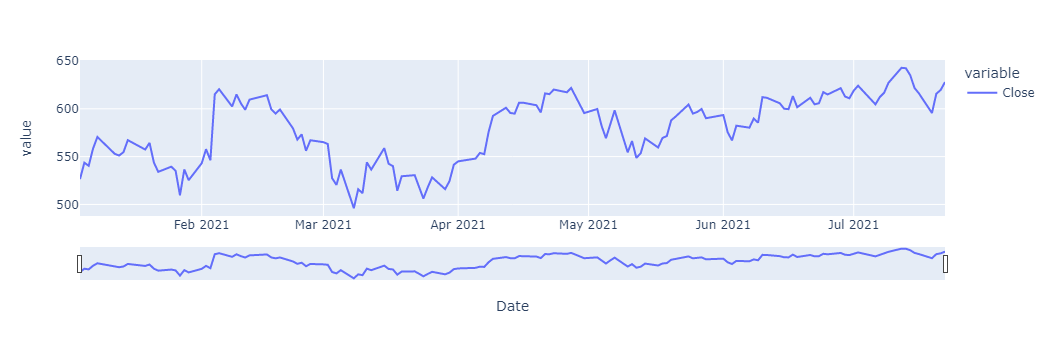

In [47]:
fig = px.line(algn_data['Close'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

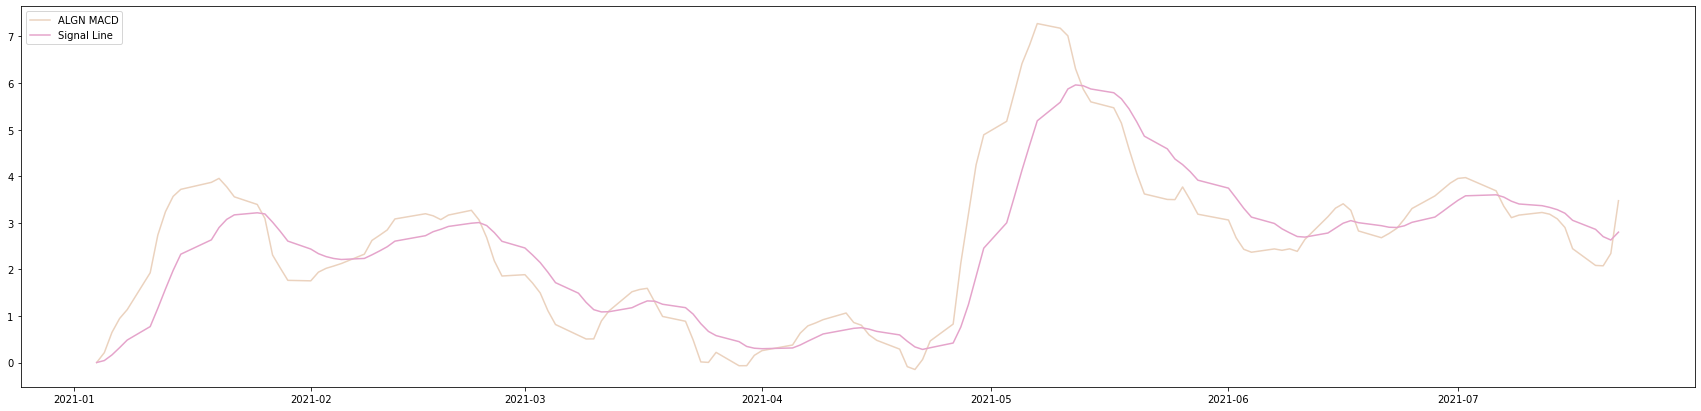

In [55]:
#Moving Average Convergence Divergence MACD, consists of MACD line and signal line
#Calculationg MACD for CROX

exp1 = crox_data['Close'].ewm(span=12, adjust=False).mean()
exp2 = crox_data['Close'].ewm(span=26, adjust=False).mean()

crox_macd = exp1-exp2
crox_exp3 = crox_macd.ewm(span=9, adjust=False).mean()


plt.figure(figsize=(30,7))
plt.plot(crox_data.index, crox_macd, label='ALGN MACD', color = '#EBD2BE')
plt.plot(crox_data.index, crox_exp3, label='Signal Line', color='#E5A4CB')
plt.legend(loc='upper left')
plt.show()

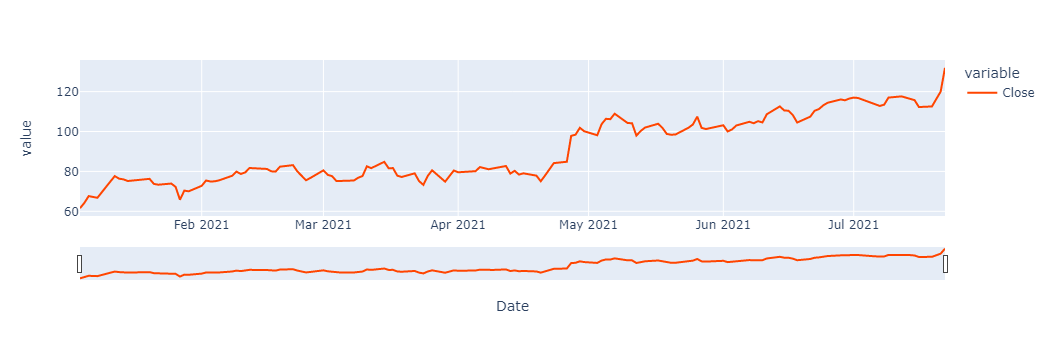

In [49]:
fig = px.line(crox_data['Close'])
fig.update_traces(line_color='#FF4500')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [50]:

#Bollinger Bands simply add and subtract a standard deviation calculation.
#Standard deviation is a mathematical formula that measures volatility, showing how the stock price can vary from its true value

#btc_data = btc_data[750:900]

algn_data_15MA = algn_data['Close'].transform(lambda x: x.rolling(window=15).mean())
algn_data_SD = algn_data['Close'].transform(lambda x: x.rolling(window=15).std())
algn_data_upperband = algn_data_15MA + 2*algn_data_SD
algn_data_lowerband = algn_data_15MA - 2*algn_data_SD

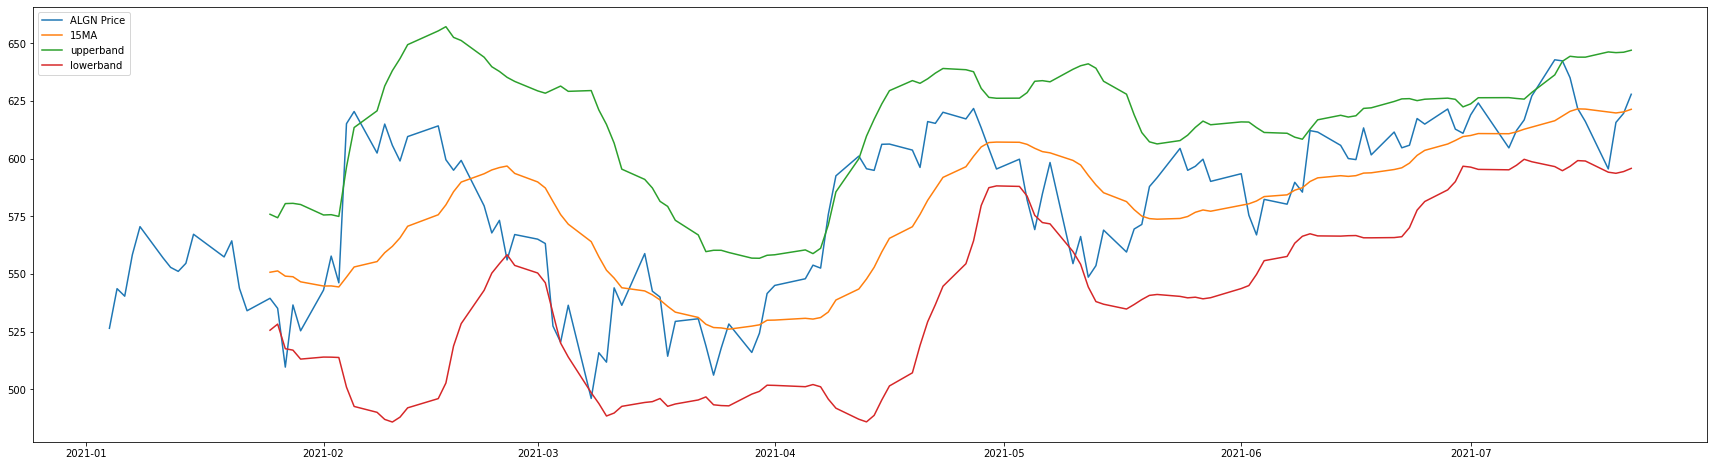

In [56]:
plt.figure(figsize=(30,8))
plt.plot(algn_data.index, algn_data['Close'], label='ALGN Price')
plt.plot(algn_data_15MA, label='15MA')
plt.plot(algn_data_upperband, label='upperband')
plt.plot(algn_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()

In [52]:
crox_data_15MA = crox_data['Close'].transform(lambda x: x.rolling(window=15).mean())
crox_data_SD = crox_data['Close'].transform(lambda x: x.rolling(window=15).std())
crox_data_upperband = crox_data_15MA + 2*crox_data_SD
crox_data_lowerband = crox_data_15MA - 2*crox_data_SD

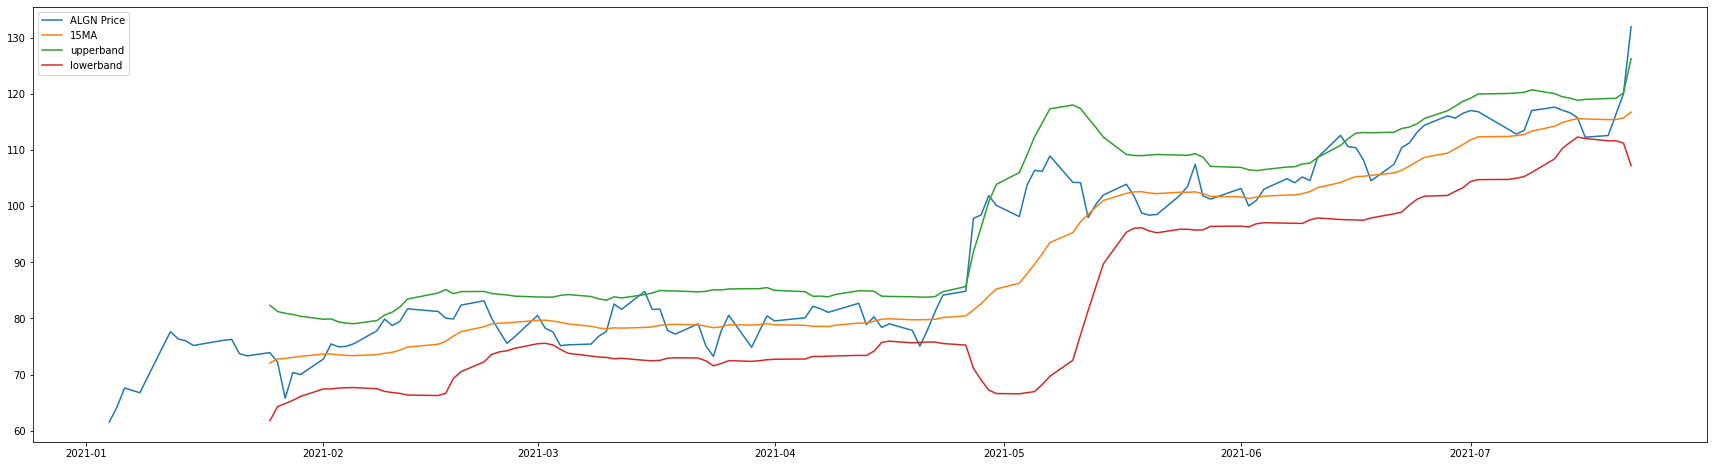

In [57]:
plt.figure(figsize=(30,8))
plt.plot(crox_data.index, crox_data['Close'], label='ALGN Price')
plt.plot(crox_data_15MA, label='15MA')
plt.plot(crox_data_upperband, label='upperband')
plt.plot(crox_data_lowerband, label='lowerband')
plt.legend(loc='upper left')
plt.show()